In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Inputs (training set) shape: {x_train.shape}")
print(f"Labels (training set) shape: {y_train.shape}")

Inputs (training set) shape: (60000, 28, 28)
Labels (training set) shape: (60000,)


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

print(f"Inputs (training set) shape: {x_train.shape}")
print(f"Labels (training set) shape: {y_train.shape}")

Inputs (training set) shape: (60000, 28, 28, 1)
Labels (training set) shape: (60000,)


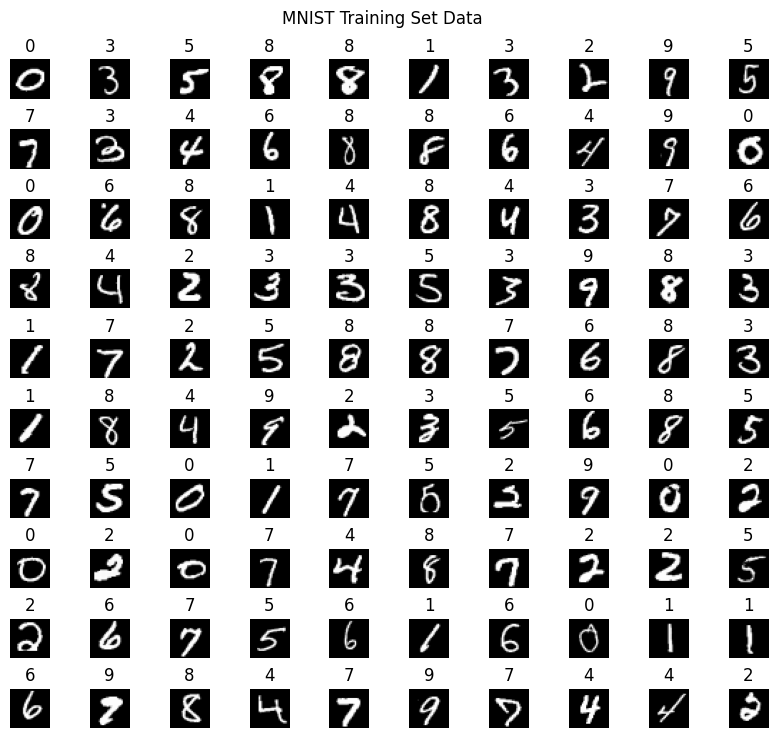

In [4]:
test_length, img_width, img_height, channels = x_train.shape

fig, axs = plt.subplots(10,10, figsize=(8,8))
fig.suptitle("MNIST Training Set Data")
fig.tight_layout(pad=0.1, rect=[0, 0.05, 1, 0.95])

for i, ax in enumerate(axs.flat):    
    random_index = np.random.randint(test_length)
    random_x = x_train[random_index]
    random_y = y_train[random_index]
    
    ax.imshow(random_x, cmap='gray')
    ax.set_title(random_y)

    ax.set_axis_off()

In [5]:
model = Sequential(
    [
        tf.keras.Input(shape=(img_width, img_height, 1)),
        Conv2D(32, (5, 5), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.35),
        Conv2D(64, (5, 5), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.35),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dropout(0.35),
        Dense(units=64, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,472 (412.00 KB)

 Trainable params: 105,472 (412.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6474 - sparse_categorical_accuracy: 0.7987
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9715
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9785
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9826
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0494 - sparse_categorical_accuracy: 0.9843
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0469 - sparse_categorical_accuracy: 0.9863
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0423 - sparse_categorical_accuracy: 0.9875
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9882
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9875
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9933
Test Accuracy: 0.9946


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

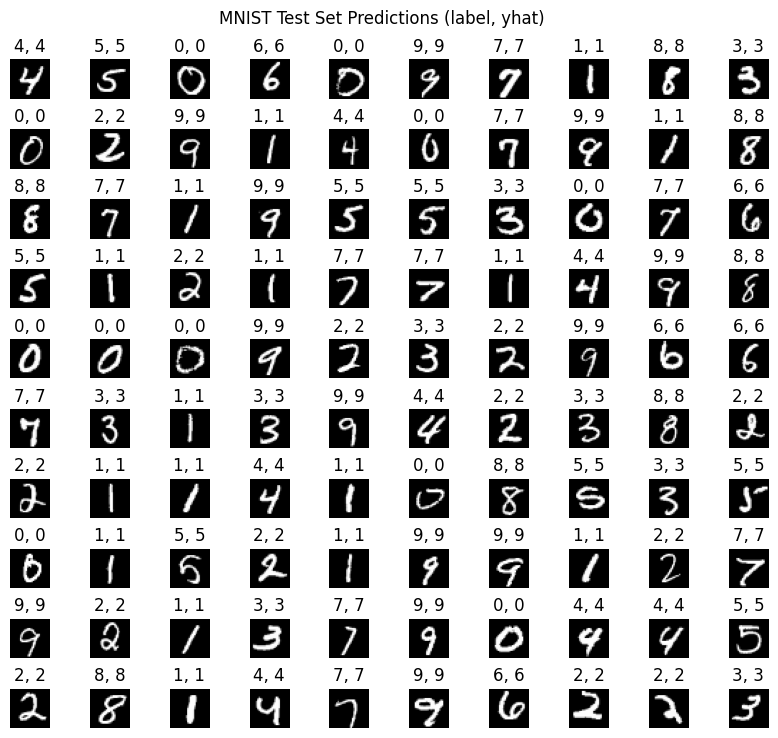

In [8]:
fig, axs = plt.subplots(10, 10, figsize=(8,8))
fig.suptitle("MNIST Test Set Predictions (label, yhat)")
fig.tight_layout(pad=0.1, rect=[0, 0.05, 1, 0.95])

for i, ax in enumerate(axs.flat):
    random_test_index = np.random.randint(x_test.shape[0])
    random_test_x = x_test[random_test_index]
    random_test_y = y_test[random_test_index]
    
    random_test_x_batch = np.expand_dims(random_test_x, axis=0)
    random_test_prob = model.predict(random_test_x_batch)
    
    predicted_digit = np.argmax(random_test_prob)
    actual_digit = random_test_y 
    
    ax.imshow(random_test_x, cmap='gray')
    ax.set_title(f"{actual_digit}, {predicted_digit}")
    ax.set_axis_off()